## 18.3 Minimum spanning tree

A city council wants to control all traffic lights at junctions in real-time,
from a control centre, so that traffic flow can be improved.
For that, they need to lay fibre optic cable under the streets,
from each junction to the control centre. The council wants to
reduce costs by laying as little cable as possible. Where should cable be laid?

We can model the city as an undirected weighted graph with
one node for the centre, one node per junction and one edge per street.
The weights represent the lengths of the streets. The problem requires
selecting a subset of the edges, with the least total weight,
so that all junction nodes are connected to the centre node.

The next figure shows two solutions, with total weight 7, for the same graph.
The dashed lines are the graph edges not included in the solution.
Node C represents the control centre.

<p id="fig-18.3.1"></p>

*[Figure 18.3.1](../33_Figures/Figures_18_3.ipynb#Figure-18.3.1)*

![Image 18_3_two_msts.png](18_3_two_msts.png)

A **spanning tree** of an undirected graph G is a subgraph of G that
is a tree, i.e. is connected and acyclic, and has all nodes of G.
The tree spans over all nodes, hence its name.
A spanning tree is a subgraph with the fewest edges that still connect all nodes.
If G isn't connected, then it has no spanning tree;
otherwise it may have multiple spanning trees.

If G is weighted, then a **minimum spanning tree** (MST) of G is a spanning tree
with the lowest possible sum of weights.

The problem given at the start is thus a particular formulation of the more
general problem of computing an MST of a weighted undirected connected graph.
Finding an MST solves the problem of connecting all nodes in the shortest,
cheapest or fastest way, depending on what the weights represent.

We'll look at two versions of the same greedy algorithm to construct an MST.

### 18.3.1 First algorithm

The following algorithm constructs a tree incrementally, one node at a time,
from a given *start* node. At each step, it adds an edge between a node
that is in the tree and one that isn't. This avoids introducing cycles,
to guarantee that the subgraph constructed is a tree.

Each step adds one more node to the tree, so to obtain a spanning tree we stop
after *n* – 1 iterations, where *n* is the number of nodes.
To obtain a minimum spanning tree, we choose at each step the edge with
the lowest weight. This will lead to the least total weight.
I'll explain why later. First the algorithm.

1. let *tree* be the weighted undirected graph with single node *start*
1. repeat *n* − 1 times:
   1. find an edge (A, B) with lowest weight(A, B) such that A is in *tree* but B isn't
   1. add node B to *tree*
   1. add edge (A, B, weight(A, B)) to *tree*

At each step, the algorithm's greedy choice is to add the node 'nearest' to the
tree. For the example above, starting at node C, the algorithm first adds
the edge to node B, then to node A and finally to node D.
It constructs the MST on the right, not the one on the left.

If the algorithm starts at node D, then the first iteration may add the edge
to B or the edge to A and thus lead to the left or right MST, respectively.

This algorithm is commonly known as **Prim's algorithm**.

<div class="alert alert-info">
<strong>Info:</strong> The algorithm was first invented and published in 1930 by Vojtěch Jarník and
independently reinvented by Robert Prim in 1957 and Edsger Dijkstra in 1959.
</div>

Step&nbsp;2.1 can be done with a linear search over all edges. The algorithm has
complexity (*n* – 1) × Θ(*e*) = Θ(*n* × *e* – *e*) = Θ(*n* × *e*).

Does it help to first sort the edges by ascending weight?

___

Sorting the edges helps to make the search faster in practice, as it can stop
when it finds the first edge between a tree node and a non-tree node.
However, the complexity gets worse: Θ(*e* log *e*) + Θ(*n* × *e*).

If the edges are sorted, why not use binary search instead of linear search
to reduce the complexity to
Θ(*e* log *e*) + Θ(*n* × log *e*) = Θ((*e* + *n*) log *e*)?

___

We can't use binary search because we're looking for an edge between two nodes
with specific characteristics. Let's suppose the edge in the middle is between
two tree nodes or between two non-tree nodes. That doesn't tell us whether
an edge between a tree node and a non-tree node is to the left or to the right.

This simple version of Prim's algorithm is inefficient because it searches
all edges over and over although at any point in time there are relatively
few edges between nodes in the tree and nodes outside the tree.

Even though the algorithm is inefficient, it's correct.
At each step, it chooses an edge that does belong to the MST.
To see why, consider the following diagram of the MST of some graph.
I've omitted the weights and most of the node labels.

<p id="fig-18.3.2"></p>

*[Figure 18.3.2](../33_Figures/Figures_18_3.ipynb#Figure-18.3.2)*

![Image 18_3_prim.png](18_3_prim.png)

The subtree to the left of the dashed line is the part of the MST
the algorithm has constructed so far, beginning with the start node.
The subtree to the right of the dashed line is the rest of the MST,
with the yet-unvisited nodes.
Edge M is the one edge in the MST that connects both subtrees.

Why is there exactly one such edge?
First, there must be at least one edge connecting both subtrees,
otherwise the MST wouldn't span all nodes.
Second, there cannot be two edges connecting both subtrees, because then the
MST would have a cycle: we could go from the start node to the right subtree
via one edge and return to the start via another.
Since MSTs are trees, they don't have cycles.

Among all edges the input graph has between the left subtree and
the right subtree, edge M has the lowest weight.
To see why, imagine the graph has an edge between nodes A and B in the diagram.
If its weight were lower than M's, we could replace edge M with edge (A, B)
to obtain a tree that spans all nodes and has a lower total weight.
That's contrary to the starting assumption that the tree with edge M is
a minimum spanning tree. So M has the lowest weight among all edges
connecting the left and right subtrees.
Therefore Prim's algorithm will pick it.

If edge (A, B) has the same weight as edge M, then there are two MSTs:
one has M and the other has (A, B), so it doesn't matter which one
Prim's algorithm picks: both lead to a spanning tree with the same total weight.

#### Exercise 18.3.1

Inspired by Prim's algorithm, Bob invents a greedy algorithm to solve the TSP.
Beginning with the start node, it extends the tour by one node at a time,
adding the 'nearest' node to the currently last node in the tour.
After doing this *n* – 1 times,
it adds the edge from the last node to the start node.
The input graph is complete, so that edge always exists and completes the tour.

Here's Prim's algorithm again. Modify it to become Bob's algorithm.

1. let *tree* be the weighted undirected graph with single node *start*
1. repeat *n* − 1 times:
   1. find an edge (A, B) with lowest weight(A, B) such that A is in *tree* but B isn't
   1. add node B to *tree*
   1. add edge (A, B, weight(A, B)) to *tree*

[Hint](../31_Hints/Hints_18_3_01.ipynb)
[Answer](../32_Answers/Answers_18_3_01.ipynb)

#### Exercise 18.3.2

As Bob thinks of some tests for his algorithm, he realises
it doesn't solve the TSP. Show a counter-example.

_Write your answer here._

[Hint](../31_Hints/Hints_18_3_02.ipynb)
[Answer](../32_Answers/Answers_18_3_02.ipynb)

Bob's greedy algorithm is an example of a
[heuristic algorithm](../11_Search/11_7_summary.ipynb#11.7.1-Problems):
it doesn't compute the optimal solution, only an approximate one,
but it's much faster than the correct brute-force search algorithm.
The greedy algorithm has the same complexity as Prim's algorithm, Θ(*n*×*e*),
whereas searching all tours, i.e. all node permutations, for the shortest one
takes Θ(*n*!).

### 18.3.2 Second algorithm

Prim's algorithm constructs a tree one edge at a time,
to a node not in the tree. We already have a similar algorithm:
[graph traversal](../17_Graphs_1/17_7_traversal.ipynb#17.7.4-Second-algorithm).
It also produces a tree, visiting one new node at a time.
Each iteration processes the next edge. If it connects two visited nodes,
it's discarded; otherwise the node it leads to is visited and
its out-going edges are added to those yet to be processed.

We get different traversals depending on the unprocessed edges collection.
If it's a set, we get a random traversal. If it's a queue, we get a
[breadth-first search](../17_Graphs_1/17_8_bfs_dfs.ipynb#17.8-Breadth--and-depth-first-search) because
the edges discovered first are followed before the others. It it's a stack,
we get a depth-first search because the last discovered edge is followed next.

If we instead use a [min-priority queue](../07_Ordered/07_4_priority_queue.ipynb#7.4-Priority-queues), where
the priority is the edge weight, we get Prim's algorithm because
the next edge followed is the one with lowest weight.
Here is the generic traversal algorithm, with the necessary changes:
the input and output graphs are weighted and undirected,
and the edge weights are used as priorities. Remember that max(*pq*) represents
the highest-priority item in priority queue *pq*.

1. let *visited* be an undirected weighted graph with node *start*
2. let *unprocessed* be an empty min-priority queue
3. for each *node* in neighbours of *start* in *graph*:
   1. add (*start*, *node*) with priority weight(*start*, *node*) to *unprocessed*
4. while *unprocessed* isn't empty:
   1. let (*previous*, *current*) be max(*unprocessed*) with priority *weight*
   2. remove max(*unprocessed*)
   3. if *visited* doesn't have node *current*:
      1. add *current* to *visited*
      2. add (*previous*, *current*, *weight*) to *visited*
      3. for each *node* in neighbours of *current* in *graph*:
         1. add (*current*, *node*) with priority weight(*current*, *node*) to *unprocessed*

Like the previous traversal algorithms, this one visits each node once,
so steps 1 and 4.3.1 take in total Θ(*n*) time.

All edges of a just-visited node are added to the priority queue,
so each edge (A, B) is added twice: first when visiting A, next when visiting B.
If a priority queue is implemented with a heap, adding and removing an item
takes logarithmic time in the length of the queue at that moment.
The priority queue has at most 2×*e* edges (usually far fewer),
so processing the edges takes  2 × *e* × O(log 2×*e*) = O(*e* log *e*).

The overall complexity of this version of Prim's algorithm is
Θ(*n*) + O(*e* log *e*) = O(*e* log *e*).
A tree has *n* – 1 edges, so connected graphs have *e* ≥ *n* – 1 edges.
Hence *e* log *e* ≥ *n* and we can ignore the slower-growing term Θ(*n*).

#### Exercise 18.3.3

Suggest a change to the algorithm that, while not reducing its complexity, will
reduce the run-time for many graphs.

_Write your answer here._

[Hint](../31_Hints/Hints_18_3_03.ipynb)
[Answer](../32_Answers/Answers_18_3_03.ipynb)

#### Exercise 18.3.4

Given an undirected weighted connected graph in which all weights are the same,
can we compute an MST of that graph without using Prim's algorithm?

_Write your answer here._

[Hint](../31_Hints/Hints_18_3_04.ipynb)
[Answer](../32_Answers/Answers_18_3_04.ipynb)

### 18.3.3 Code

Let's implement and run the algorithm. I'll leave it as an exercise to
implement the run-time improvements of Exercise 18.3.3.

In [1]:
%run -i ../m269_digraph
%run -i ../m269_ungraph

I implement the priority queue with
[Python's heap functions](../16_Trees/16_6_heapsort.ipynb#16.6.5-Heaps-in-Python).
Since they don't separate the priority from the item,
I must add edges to the heap as triples (*weight*, *node1*, *node2*)
for the heap to sort them by weight.
If two edges have the same weight, they will be sorted by the nodes,
so we must assume that the node objects are comparable.

In [2]:
# this code is also in m269_ungraph.py

from heapq import heappush, heappop

def prim(graph: WeightedUndirectedGraph, start: Hashable) -> WeightedUndirectedGraph:
    """Return a minimum spanning tree of graph, beginning at start.

    Preconditions:
    - graph.has_node(start)
    - graph is connected
    - node objects are comparable
    """
    visited = WeightedUndirectedGraph()
    visited.add_node(start)

    unprocessed = []
    for neighbour in graph.neighbours(start):
        weight = graph.weight(start, neighbour)
        heappush(unprocessed, (weight, start, neighbour) )

    while len(unprocessed) > 0:
        edge = heappop(unprocessed)
        weight = edge[0]
        previous = edge[1]
        current = edge[2]
        if not visited.has_node(current):
            visited.add_node(current)
            visited.add_edge(previous, current, weight)
            for neighbour in graph.neighbours(current):
                weight = graph.weight(current, neighbour)
                heappush(unprocessed, (weight, current, neighbour) )
    return visited

Next I create the example graph.

In [3]:
# this code is also in m269_graphs.py

# graph in Figure 18.3.1
RHOMBUS = WeightedUndirectedGraph()
for node in 'ABCD':
    RHOMBUS.add_node(node)
RHOMBUS.add_edge('A', 'B', 1)
RHOMBUS.add_edge('A', 'D', 2)
RHOMBUS.add_edge('B', 'C', 4)
RHOMBUS.add_edge('B', 'D', 2)
RHOMBUS.add_edge('C', 'D', 5)

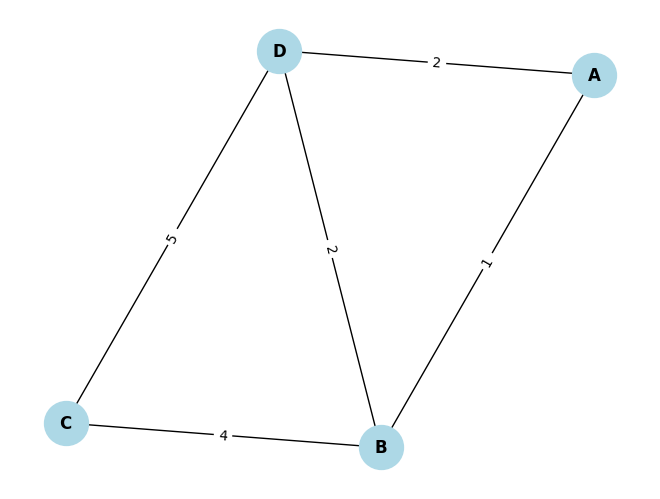

In [4]:
RHOMBUS.draw()

Edge (A, D) is always chosen before (B, D) because
`(2, 'A', 'D') < (2, 'B', 'D')` when the heap compares them.
The function always produces the same MST, of the two possible,
no matter what start node we select.

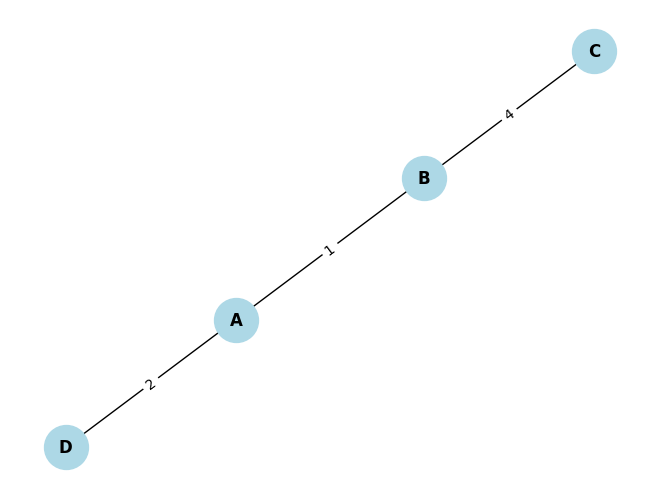

In [5]:
prim(RHOMBUS, 'D').draw()  # replace D with A, B or C

⟵ [Previous section](18_2_weighted_graph.ipynb) | [Up](18-introduction.ipynb) | [Next section](18_4_shortest_path.ipynb) ⟶